## STEP 1: COLLECT DATA

Load libraries

In [64]:
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, f1_score
#from causalinference import CausalModel


Load data

In [65]:
df = pd.read_csv(r'data\Spark_vyborka_kompaniy_20230318_1520_1 (1).csv')
df['Conflict'] = df['Conflict']==1
df['Size_company']=df['Size_company']==0
df['T']=df['T']==0
df

,№,Name,Reg_number,Name_Full,Company_year,Size_company,Conflict,T,Capital,Clr,Returns,Ndter,Rddta,Total_debt
0,1,"( КОЛХОЗ ) ИМ. КИРОВА ., СПК",1030000000000.00,СЕЛЬСКОХОЗЯЙСТВЕННЫЙ ПРОИЗВОДСТВЕННЫЙ КООПЕРАТ...,25.00,True,False,False,74299000,7.50,0.12,0.01,NaN,10985000.00
1,1,"( КОЛХОЗ ) ИМ. КИРОВА ., СПК",1030000000000.00,СЕЛЬСКОХОЗЯЙСТВЕННЫЙ ПРОИЗВОДСТВЕННЫЙ КООПЕРАТ...,25.00,True,False,True,68168000,6.67,0.05,0.05,NaN,13156000.00
2,2,"(АО), КРОО",1120000000000.00,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""КОРПОРАЦИЯ РАЗВИТИЯ ОРЕН...",12.00,True,False,False,439447000,1.00,-30.32,-0.07,0.02,66112000.00
3,2,"(АО), КРОО",1120000000000.00,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""КОРПОРАЦИЯ РАЗВИТИЯ ОРЕН...",12.00,True,False,True,486726000,1.60,-1.91,-0.00,0.16,160965000.00
4,6,"(КОЛХОЗ) ИМ. ЛЕНИНА, СПК",1030000000000.00,СЕЛЬСКОХОЗЯЙСТВЕННЫЙ ПРОИЗВОДСТВЕННЫЙ КООПЕРАТ...,23.50,True,False,True,61342000,3.87,0.00,0.12,0.03,10023000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837,2498,"АГК, ООО",1140000000000.00,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АЗНА...",8.50,True,False,False,9496000,1.09,0.20,-0.22,0.42,16128000.00
2838,2498,"АГК, ООО",1140000000000.00,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АЗНА...",8.50,True,False,True,2503000,1.33,0.21,-1.47,0.35,10612000.00
2839,2499,"АГК, ООО",1090000000000.00,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АМУР...",13.00,False,False,False,-31687000,NaN,NaN,NaN,NaN,35187000.00
2840,2500,"АГК-1, ООО",1170000000000.00,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АЛЬТ...",6.50,True,False,False,6089094000,0.91,-0.56,0.26,0.06,9408048000.00


Clearing data

In [66]:
df = df.filter(['Company_year', 'Conflict', 'Size_company', 'T','Capital','Clr','Returns','Ndter','Reddta','Total_debt']).dropna().reset_index(drop=True)
df

,Company_year,Conflict,Size_company,T,Capital,Clr,Returns,Ndter,Total_debt
0,25.00,False,True,False,74299000,7.50,0.12,0.01,10985000.00
1,25.00,False,True,True,68168000,6.67,0.05,0.05,13156000.00
2,12.00,False,True,False,439447000,1.00,-30.32,-0.07,66112000.00
3,12.00,False,True,True,486726000,1.60,-1.91,-0.00,160965000.00
4,23.50,False,True,True,61342000,3.87,0.00,0.12,10023000.00
...,...,...,...,...,...,...,...,...,...
2595,5.00,False,True,True,161000,0.90,0.01,-5.75,14381000.00
2596,8.50,False,True,False,9496000,1.09,0.20,-0.22,16128000.00
2597,8.50,False,True,True,2503000,1.33,0.21,-1.47,10612000.00
2598,6.50,False,True,False,6089094000,0.91,-0.56,0.26,9408048000.00


In [67]:
Conflict = 'Conflict'
Returns = 'Returns'
df.groupby(Conflict)[Returns].describe()

,count,mean,std,min,25%,50%,75%,max
Conflict,,,,,,,,
False,2464.00,-0.67,18.22,-851.00,0.00,0.04,0.11,1.00
True,136.00,0.12,0.21,-1.03,0.02,0.07,0.18,1.00


Create plot (Company year)

In [68]:
df[df[Conflict]]

,Company_year,Conflict,Size_company,T,Capital,Clr,Returns,Ndter,Total_debt
62,10.50,True,True,False,20000,1.09,0.07,-1.50,230000.00
63,10.50,True,True,True,370000,1.90,0.06,-0.11,410000.00
165,23.50,True,True,False,16924000,3.33,0.50,-0.21,1854000.00
166,23.50,True,True,True,18933000,3.09,0.45,-0.15,1605000.00
294,4.00,True,True,False,42000,3.72,0.07,7.26,412000.00
...,...,...,...,...,...,...,...,...,...
2385,7.00,True,True,False,-1796000,0.82,-0.11,0.00,10078000.00
2427,9.50,True,True,True,15607000,5.59,0.02,-0.06,2995000.00
2428,9.50,True,True,False,12920000,1.49,0.01,-0.12,23890000.00
2429,17.00,True,True,False,18883000,0.11,0.54,1.83,47592000.00


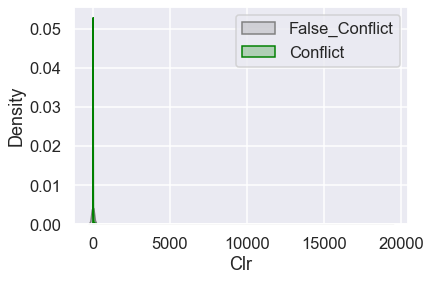

In [90]:
C_COLOUR = 'grey'
T_COLOUR = 'green'
C_LABEL = 'False_Conflict'
T_LABEL = 'Conflict'
sns.kdeplot(data=df[~df[Conflict]], x='Clr', shade=True,
            color=C_COLOUR, label=C_LABEL)
sns.kdeplot(data=df[df[Conflict]], x='Clr', shade=True,
            color=T_COLOUR, label=T_LABEL)
plt.legend();

The Conflict group has more younger company compared to the False_Conflict

Create bar plot (Size company)

In [70]:
F_COLOUR = 'magenta'
M_COLOUR = 'blue'
F_LABEL = 'Macro'
M_LABEL = 'Micro'
size_company = 100 * pd.crosstab(df[Conflict].replace({True: T_LABEL,
                                                        False: C_LABEL}),
                                 df['Size_company'].replace({True: 'Macro',
                                                             False: 'Micro'}),
                                 normalize='index')
size_company['All'] = 100

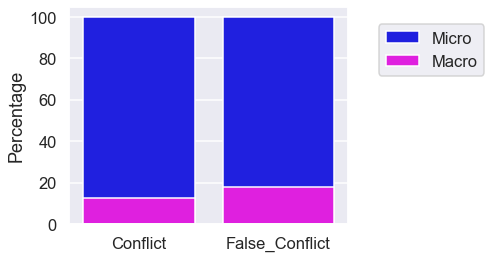

In [71]:

plt.figure(figsize=(5, 4))
sns.barplot(data=size_company, x=size_company.index.astype(str),  y="All",
            color=M_COLOUR, label=M_LABEL)
sns.barplot(data=size_company, x=size_company.index.astype(str),  y='Micro',
            color=F_COLOUR, label=F_LABEL)
plt.legend(loc='center', bbox_to_anchor=(1.3, 0.8))
plt.xlabel('')
plt.ylabel('Percentage');

More in micro company

## STEP 2: ESTIMATE PROPENSITY SCORES


Build a descriptive model

In [78]:
t = df[Conflict]
X = pd.get_dummies(df.drop(columns=[Returns, Conflict]))
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_classifier', LogisticRegression())
])
pipe.fit(X, t)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_classifier', LogisticRegression())])

Predict

In [145]:
threshold = 0.5
df['proba'] = pipe.predict_proba(X)[:,1]
df['logit'] = df['proba'].apply(lambda p: np.log(p/(1-p)))
df['pred'] = np.where(df['proba']>=threshold, 1, 0)
df['proba']

1684   0.05
1307   0.05
2435   0.06
2434   0.06
2405   0.05
       ... 
148    0.06
369    0.06
1707   0.06
1054   0.05
180    0.17
Name: proba, Length: 2600, dtype: float64

In [146]:
df

,Company_year,Conflict,Size_company,T,Capital,Clr,Returns,Ndter,Total_debt,proba,logit,pred,match,distance
1684,6.00,False,True,True,1279000,0.21,0.07,1.95,13649000.00,0.05,-3.01,0,NaN,NaN
1307,6.50,False,False,False,2611632000,1.10,0.22,-0.18,21364889000.00,0.05,-2.93,0,NaN,NaN
2435,9.50,False,True,True,944000,1.21,0.03,1.03,4584000.00,0.06,-2.77,0,NaN,NaN
2434,12.50,False,True,False,14931000,20.32,0.23,2.14,32276000.00,0.06,-2.71,0,NaN,NaN
2405,21.50,False,True,False,81162000,14.64,1.00,1.30,120693000.00,0.05,-2.92,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,26.50,False,False,True,496194000,2.71,0.06,0.87,705347000.00,0.06,-2.67,0,NaN,NaN
369,15.00,False,True,True,2082000,1.13,0.04,1.45,15754000.00,0.06,-2.81,0,NaN,NaN
1707,16.00,False,False,True,28494000,1.09,0.02,3.27,288666000.00,0.06,-2.73,0,NaN,NaN
1054,8.50,False,True,True,114000,0.83,-0.00,17.28,3108000.00,0.05,-2.90,0,NaN,NaN


In [147]:
print(f"Accuracy: {np.mean(df[Conflict]==df['pred']):.4f},\
 ROC AUC: {roc_auc_score(df[Conflict], df['proba']):.4f},\
 F1-score: {f1_score(df[Conflict], df['pred']):.4f}")
# Visualise confusion matrix
pd.crosstab(df[Conflict], df['pred']).rename(columns={0: False,
                                                       1:True})

Accuracy: 0.9477, ROC AUC: 0.4968, F1-score: 0.0000


pred,False
Conflict,
False,2464
True,136


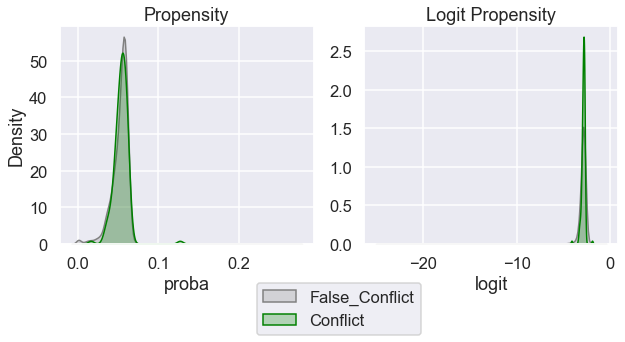

In [148]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
# Visualise propensity
sns.kdeplot(data=df[~df[Conflict]], x='proba', shade=True,
            color=C_COLOUR, label=C_LABEL, ax=ax[0])
sns.kdeplot(data=df[df[Conflict]], x='proba', shade=True,
            color=T_COLOUR, label=T_LABEL, ax=ax[0])
ax[0].set_title('Propensity')
ax[0].legend(loc='center', bbox_to_anchor=(1.1, -0.3))
# Visualise logit propensity
sns.kdeplot(data=df[~df[Conflict]], x='logit', shade=True,
            color=C_COLOUR, label=C_LABEL, ax=ax[1])
sns.kdeplot(data=df[df[Conflict]], x='logit', shade=True,
            color=T_COLOUR, label=T_LABEL, ax=ax[1])
ax[1].set_title('Logit Propensity')
ax[1].set_ylabel("");

## STEP 3: MATCH RECORDS

In [149]:

# Sort by 'logit' so it's quicker to find match
df.sort_values('logit', inplace=True)
n = len(df)-1

In [150]:
for i, (ind, row) in enumerate(df.iterrows()):
    # Match the most similar untreated record to each treated record
    above = df.iloc[i:]
    control_above = above[~above[TREATMENT]]
    match_above = control_above.iloc[0]

    distance_above = match_above['logit'] - row['logit']


    if row[TREATMENT]:
            # Find the closest untreated match among records sorted
            # higher. 'equal_or_above would' be more accurate but
            # used 'above' for brevity
            if i<n:
                above = df.iloc[i:]
                control_above = above[~above[TREATMENT]]
                match_above = control_above.iloc[0]
                distance_above = match_above['logit'] - row['logit']
                df.loc[ind, 'match'] = match_above.name
                df.loc[ind, 'distance'] = distance_above

            # Find the closest untreated match among records sorted
            # lower. 'equal_or_below' would be more accurate but
            # used 'below' for brevity
            if i>0:
                below = df.iloc[:i-1]
                control_below = below[~below[TREATMENT]]
                match_below = control_below.iloc[-1]
                distance_below = match_below['logit'] - row['logit']
                if i==n:
                    df.loc[ind, 'match'] = match_below.name
                    df.loc[ind, 'distance'] = distance_below

                # Only overwrite if match_below is closer than match_above
                elif distance_below<distance_above:
                    df.loc[ind, 'match'] = match_below.name
                    df.loc[ind, 'distance'] = distance_below
df[df[TREATMENT]]

,Company_year,Conflict,Size_company,T,Capital,Clr,Returns,Ndter,Total_debt,proba,logit,pred,match,distance
591,19.00,True,True,False,90334000,4.85,0.49,0.60,61811000.00,0.02,-4.12,0,963.00,-0.04
592,14.00,True,True,False,32683000,29.47,0.23,-0.24,1107000.00,0.03,-3.39,0,372.00,-0.00
1001,6.50,True,True,True,161000,0.81,0.00,39.27,21937000.00,0.03,-3.35,0,373.00,-0.01
609,15.00,True,True,False,11105000,6.08,0.08,0.01,2142000.00,0.04,-3.31,0,1303.00,-0.00
635,14.50,True,True,False,2433000,1.00,0.01,0.10,140165000.00,0.04,-3.28,0,1897.00,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,22.00,True,False,False,1968386000,1.73,0.08,0.97,4343611000.00,0.06,-2.69,0,2424.00,-0.00
487,11.00,True,True,True,2543000,1.16,0.01,-0.03,12177000.00,0.06,-2.68,0,1485.00,-0.00
472,20.00,True,False,False,784557000,1.78,0.05,0.69,1010715000.00,0.06,-2.68,0,1921.00,-0.00
1006,9.50,True,True,True,691000,0.99,0.02,1.41,17752000.00,0.06,-2.67,0,1612.00,-0.00


In [151]:
indices = df[df['match'].notna()].index. \
    append(pd.Index(df.loc[df['match'].notna(), 'match']))
matched_df = df.loc[indices].reset_index(drop=True)
matched_df

,Company_year,Conflict,Size_company,T,Capital,Clr,Returns,Ndter,Total_debt,proba,logit,pred,match,distance
0,19.00,True,True,False,90334000,4.85,0.49,0.60,61811000.00,0.02,-4.12,0,963.00,-0.04
1,14.00,True,True,False,32683000,29.47,0.23,-0.24,1107000.00,0.03,-3.39,0,372.00,-0.00
2,6.50,True,True,True,161000,0.81,0.00,39.27,21937000.00,0.03,-3.35,0,373.00,-0.01
3,15.00,True,True,False,11105000,6.08,0.08,0.01,2142000.00,0.04,-3.31,0,1303.00,-0.00
4,14.50,True,True,False,2433000,1.00,0.01,0.10,140165000.00,0.04,-3.28,0,1897.00,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,6.00,False,False,True,229000,0.96,-0.02,49.45,26155000.00,0.06,-2.69,0,NaN,NaN
268,22.50,False,True,True,49552000,6.47,0.24,0.35,20822000.00,0.06,-2.68,0,NaN,NaN
269,25.00,False,True,True,87638000,1.38,-0.53,-0.01,32328000.00,0.06,-2.68,0,NaN,NaN
270,16.50,False,False,True,18999000,12.92,0.01,-0.70,1594000.00,0.06,-2.67,0,NaN,NaN


## STEP 4: EVALUATE THE QUALITY OF THE MATCHED RECORDS


In [152]:
COLUMNS = ['Company_year', 'Size_company','T','Capital','Clr','Ndter','Total_debt', Returns]
matches = pd.merge(df.loc[df[Conflict], COLUMNS+['match']],
                   df[COLUMNS], left_on='match',
                   right_index=True,
                   how='left', suffixes=('_t', '_c'))
matches

,Company_year_t,Size_company_t,T_t,Capital_t,Clr_t,Ndter_t,Total_debt_t,Returns_t,match,Company_year_c,Size_company_c,T_c,Capital_c,Clr_c,Ndter_c,Total_debt_c,Returns_c
591,19.00,True,False,90334000,4.85,0.60,61811000.00,0.49,963.00,13.50,False,True,139687000,1.79,0.47,176611000.00,0.01
592,14.00,True,False,32683000,29.47,-0.24,1107000.00,0.23,372.00,17.00,False,False,12043000,77.98,0.01,120000.00,0.02
1001,6.50,True,True,161000,0.81,39.27,21937000.00,0.00,373.00,17.00,False,True,11184000,70.83,0.01,120000.00,0.31
609,15.00,True,False,11105000,6.08,0.01,2142000.00,0.08,1303.00,6.50,False,False,142993000,9.66,1.41,238840000.00,-0.00
635,14.50,True,False,2433000,1.00,0.10,140165000.00,0.01,1897.00,11.00,False,True,-369000,0.98,-3.95,17822000.00,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,22.00,False,False,1968386000,1.73,0.97,4343611000.00,0.08,2424.00,6.00,False,True,229000,0.96,49.45,26155000.00,-0.02
487,11.00,True,True,2543000,1.16,-0.03,12177000.00,0.01,1485.00,22.50,True,True,49552000,6.47,0.35,20822000.00,0.24
472,20.00,False,False,784557000,1.78,0.69,1010715000.00,0.05,1921.00,25.00,True,True,87638000,1.38,-0.01,32328000.00,-0.53
1006,9.50,True,True,691000,0.99,1.41,17752000.00,0.02,1612.00,16.50,False,True,18999000,12.92,-0.70,1594000.00,0.01


In [153]:
for var in ['logit', 'Company_year']:
    print(f"{var} | Before matching")
    display(df.groupby(Conflict)[var].describe())
    print(f"{var} | After matching")
    display(matched_df.groupby(Conflict)[var].describe())

logit | Before matching


,count,mean,std,min,25%,50%,75%,max
Conflict,,,,,,,,
False,2464.00,-2.98,0.95,-24.45,-3.00,-2.85,-2.77,-0.99
True,136.00,-2.89,0.20,-4.12,-2.98,-2.86,-2.78,-1.93


logit | After matching


,count,mean,std,min,25%,50%,75%,max
Conflict,,,,,,,,
False,136.00,-2.90,0.20,-4.16,-2.98,-2.86,-2.78,-1.96
True,136.00,-2.89,0.20,-4.12,-2.98,-2.86,-2.78,-1.93


Company_year | Before matching


,count,mean,std,min,25%,50%,75%,max
Conflict,,,,,,,,
False,2464.00,13.76,7.30,3.00,8.00,12.00,18.00,81.50
True,136.00,12.97,6.17,4.00,8.00,12.50,16.12,31.00


Company_year | After matching


,count,mean,std,min,25%,50%,75%,max
Conflict,,,,,,,,
False,136.00,12.90,6.77,4.50,8.00,11.50,16.12,31.50
True,136.00,12.97,6.17,4.00,8.00,12.50,16.12,31.00


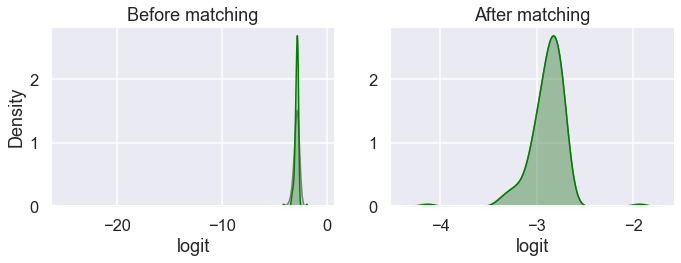

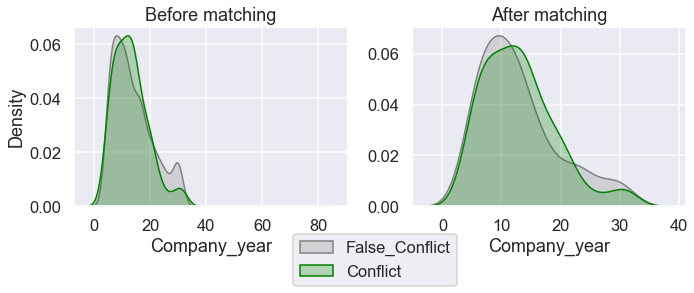

In [154]:
for var in ['logit', 'Company_year']:
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    # Visualise original distribution
    sns.kdeplot(data=df[~df[Conflict]], x=var, shade=True,
                color=C_COLOUR, label=C_LABEL, ax=ax[0])
    sns.kdeplot(data=df[df[Conflict]], x=var, shade=True,
                color=T_COLOUR, label=T_LABEL, ax=ax[0])
    ax[0].set_title('Before matching')

    # Visualise new distribution
    sns.kdeplot(data=matched_df[~matched_df[Conflict]], x=var,
                shade=True, color=C_COLOUR, label=C_LABEL, ax=ax[1])
    sns.kdeplot(data=matched_df[matched_df[Conflict]], x=var,
                shade=True, color=T_COLOUR, label=T_LABEL, ax=ax[1])
    ax[1].set_title('After matching')
    ax[1].set_ylabel("")
    plt.tight_layout()
ax[0].legend(loc='center', bbox_to_anchor=(1.1, -0.3));

In [143]:
print(f"{'is_Macro'} | Before matching")
display(pd.crosstab(df[Conflict], df['Size_company'],
                    normalize='index'))
print(f"{'is_Macro'} | After matching")
display(pd.crosstab(matched_df[Conflict], matched_df['Size_company'],
                    normalize='index'))

is_Macro | Before matching


Size_company,False,True
Conflict,,
False,0.18,0.82
True,0.12,0.88


is_Macro | After matching


Size_company,False,True
Conflict,,
False,0.16,0.84
True,0.12,0.88


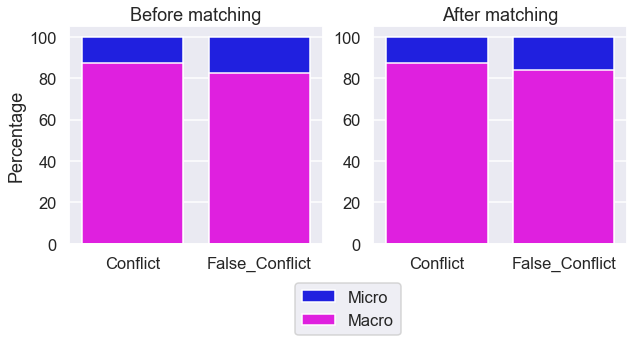

In [144]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# Visualise original distribution
sns.barplot(data=size_company, x=size_company.index.astype(str), y="All",
            color=M_COLOUR, label=M_LABEL, ax=ax[0])
sns.barplot(data=size_company, x=size_company.index.astype(str), y='Macro',
            color=F_COLOUR, label=F_LABEL, ax=ax[0])
ax[0].legend(loc='center', bbox_to_anchor=(1.1, -0.3))
ax[0].set_xlabel('')
ax[0].set_ylabel('Percentage')
ax[0].set_title('Before matching')
# Visualise new distribution
size_company_after = 100 * pd.crosstab(
    matched_df[Conflict].replace({True: T_LABEL, False: C_LABEL}),
    matched_df['Size_company'].replace({True: 'Macro', False: 'Micro'}),
    normalize='index'
)
size_company_after['All'] = 100
sns.barplot(data=size_company_after, x=size_company_after.index.astype(str),
            y="All", color=M_COLOUR, label=M_LABEL, ax=ax[1])
sns.barplot(data=size_company_after, x=size_company_after.index.astype(str),
            y='Macro', color=F_COLOUR, label=F_LABEL, ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_title('After matching')
ax[1].set_ylabel('');

## STEP 5: EVALUATE TREATMENT EFFECT ON THE OUTCOME
